In [1]:
import numpy as np
import plotly.express as px

In [2]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [3]:
classes = np.unique(df['species'])

print(f'Number of samples: {len(df)} | Number of classes : {len(classes)} - {classes}')

Number of samples: 150 | Number of classes : 3 - ['setosa' 'versicolor' 'virginica']


In [4]:
# Binary classification
# We remove class 3 and convert labels from [1, 2] to [0, 1] 

df = df[df['species_id'] != 3]
df.loc[df['species_id']==1, 'species_id'] = 0
df.loc[df['species_id']==2, 'species_id'] = 1

classes = np.unique(df['species'])

print(f'Number of samples: {len(df)} | Number of classes : {len(classes)} - {classes}')

Number of samples: 100 | Number of classes : 2 - ['setosa' 'versicolor']


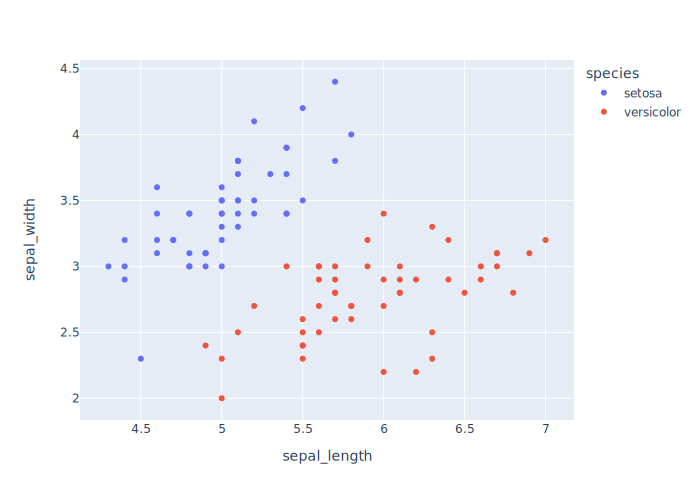

In [5]:
# This time, we only consider two features ['sepal_length', 'sepal_width']
fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
fig.show("svg")

In [6]:
features = df[['sepal_length', 'sepal_width']].values
labels = df['species_id'].values

print(f'Features shape: {features.shape} | Labels shape: {labels.shape}')

Features shape: (100, 2) | Labels shape: (100,)


# Logistic Regression
We want the hypothesis $h_{\theta}(x)$ fit in the range $0 \leq h_{\theta}(x) \leq 1$,

$$
\begin{gathered}
h_{\theta}(x)=g(\theta^{T} x) \\
g(z)=\frac{1}{1+e^{-z}},
\end{gathered}
$$

where $g$
is called **"sigmoid"** or **"logistic"** function.

<div>
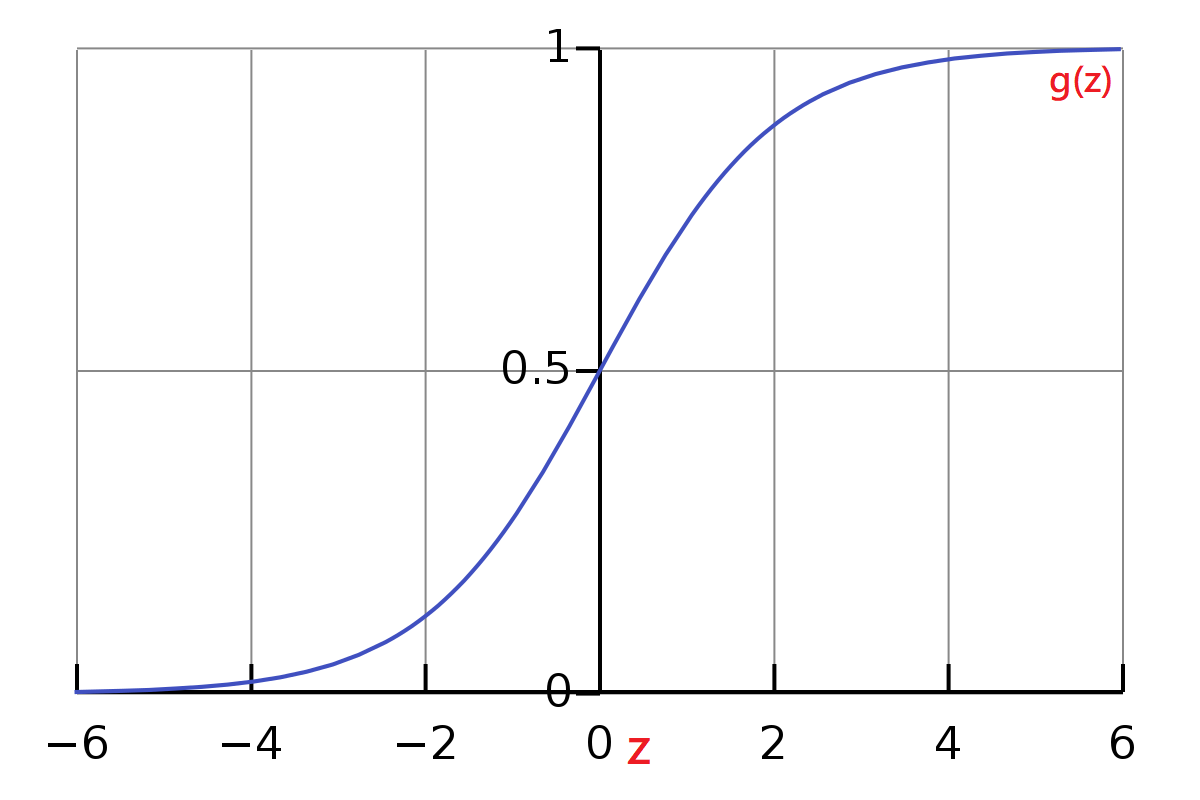
</div>

## Cost function

### Forward pass
$$
\operatorname{Cost}\left(h_{\theta}(x), y\right)=\left\{\begin{aligned}
-\log \left(h_{\theta}(x)\right) &, \text { if } y=1 \\
-\log \left(1-h_{\theta}(x)\right) &, \text { if } y=0
\end{aligned}\right.,
$$


which can be simplified as, 

$$
\operatorname{Cost}\left(h_{\theta}(x), y\right)= -y \log \left(h_{\theta}(x)\right)-(1-y) \log \left(1-h_{\theta}(x)\right)
$$


As a result, overall cost funciton can be written as follows,

$$
\begin{aligned}
J(\theta) &=\frac{1}{m} \sum_{i=1}^{m} \operatorname{Cost}\left(h_{\theta}\left(x^{(i)}\right), y^{(i)}\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{(i)} \log h_{\theta}\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]
\end{aligned}
$$

### Backward pass (Gradient Descent)
To minimize $J(\theta)$,
$$
\begin{aligned}
\theta_{j} &:=\theta_{j}-\alpha \frac{\partial}{\partial \theta_{j}} J(\theta) \\
& = \theta_{j}-\alpha \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)},
\end{aligned}
$$
(simultaneously update all $\theta_{j}$)

The gradient can be calculated in a vectorized fashion,

$$
\frac{\partial}{\partial \theta} J(\theta) =\frac{1}{m} \mathrm{X}^{\mathrm{T}}\left[h_{\theta}(x)-y\right]
$$

In [7]:
class LogisticRegression():
    def __init__(self, n_iters=10000, lr=0.01, intercept=True):
        self.n_iters = n_iters
        self.lr = lr
        self.use_intercept = intercept
        self.history = []
        
    # Forward pass
    def _sigmoid(self, z):
        return 1 / (1 + (np.exp(-z)))
    
    # Forward pass
    def _cost_function(self, h, y):   
        costs = -y * (np.log(h)) - (1-y) * (np.log(1-h))
        
        return np.mean(costs)
    
    # Backward pass (Gradient Descent)
    def _grads(self, X, h, y):
        return np.dot(X.T, (h-y)) / X.shape[0]
    
    def fit(self, X, y):
        # X : (n_samples, 2) 
        # y : (n_samples, 1)
        # Theta : (2, )
       
        if self.use_intercept:
            # X : (n_samples, 3) with intercept (i.e., ''theta_0'' + theta_1 * x_1 + theta_2 * x_2)
            
            intercept = np.ones((X.shape[0], 1))
            X = np.concatenate([intercept, X], axis=-1)

        theta = np.zeros((X.shape[1]))
        
        losses = []
        for i in range(self.n_iters):
            z = np.dot(X, theta)
            h = self._sigmoid(z)
            loss = self._cost_function(h, y)
            
            gradient = self._grads(X, h, y)
            
            theta -= self.lr * gradient
            
            losses.append(loss)
            
        self.theta = theta
        self.history = losses
    
    def predict_probs(self, X):
        if self.use_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.concatenate([intercept, X], axis=-1)
            
        z = np.dot(X, self.theta)
        h = self._sigmoid(z)
        
        return h
    
    def predict(self, X):
        h = self.predict_probs(X)
        
        return np.round(h)

In [8]:
model = LogisticRegression()
model.fit(features, labels)

In [9]:
preds = model.predict(features)

acc = np.mean(preds == labels)
print(f'Accuracy: {acc*100.0}%')

Accuracy: 99.0%


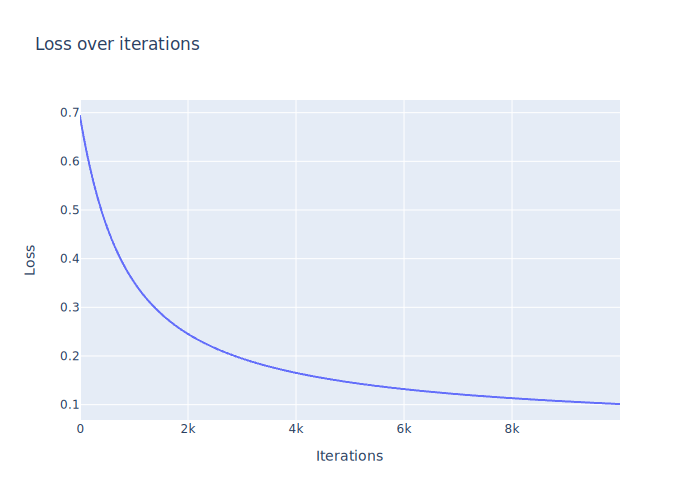

In [10]:
fig = px.line(x=range(len(model.history)), y=model.history, 
            title='Loss over iterations', 
            labels={"x": "Iterations", "y": "Loss"})
fig.show("svg")

## Decision Boundary
<div>
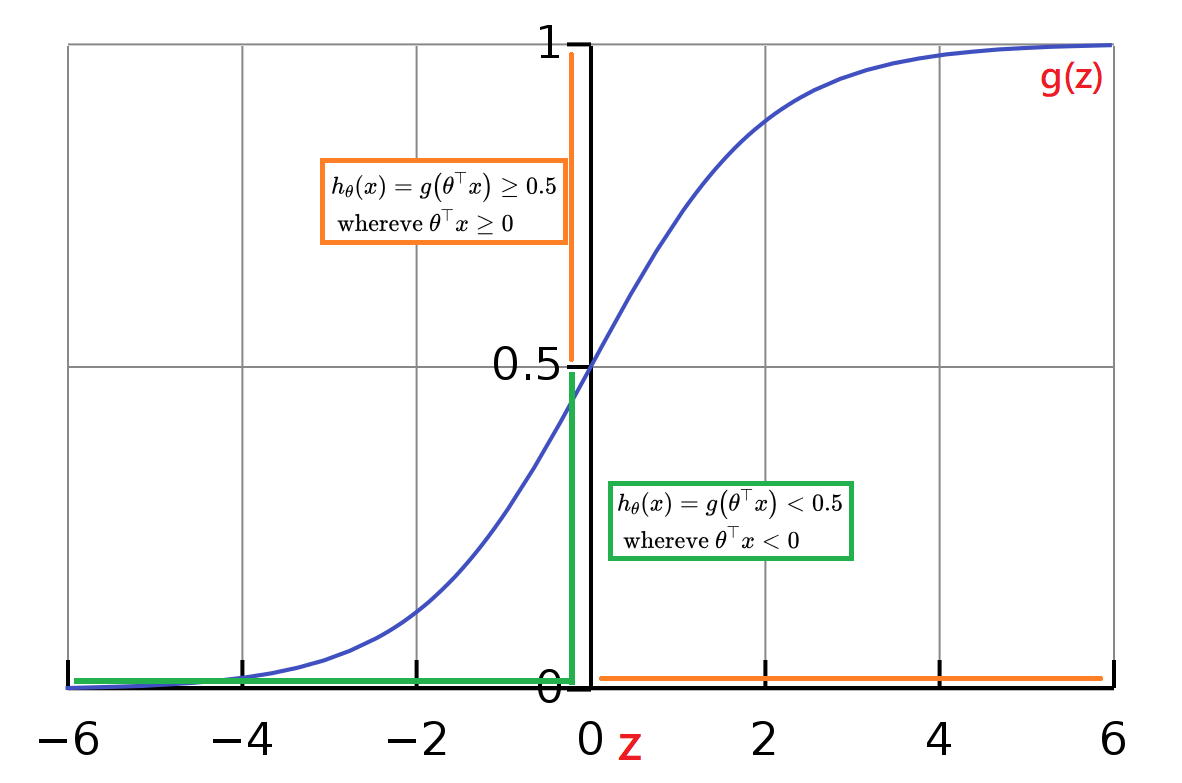
</div>

In this example, our hypothesis composed by $\theta=\left[\begin{array}{c}
\theta_0 \\
\theta_1 \\
\theta_2
\end{array}\right]$, where
$
h_{\theta}(x)=g\left(\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}\right)
$

The model predicts "$y=1$" if $\theta_0+\theta_1*x_1+\theta_2*x_2 \geq 0$, and predicts "$y=0$ if $\theta_0+\theta_1*x_1+\theta_2*x_2 < 0$

In [11]:
print(model.theta)
# Decision boundary is theta_0 + theta_1 * x_1 + theta_2 * x_2 >= 0

[-0.70846899  3.04714971 -5.10943662]


In [12]:
min_x1, max_x1 = np.min(features[:, 0]), np.max(features[:, 0])
x_1s = np.linspace(min_x1, max_x1)

theta = model.theta

boundaries = []
for x_1 in x_1s:
    x_2 = (-theta[0] -  theta[1] * x_1) / theta[2]
    
    boundaries.append([x_1, x_2])
    
boundaries = np.array(boundaries)

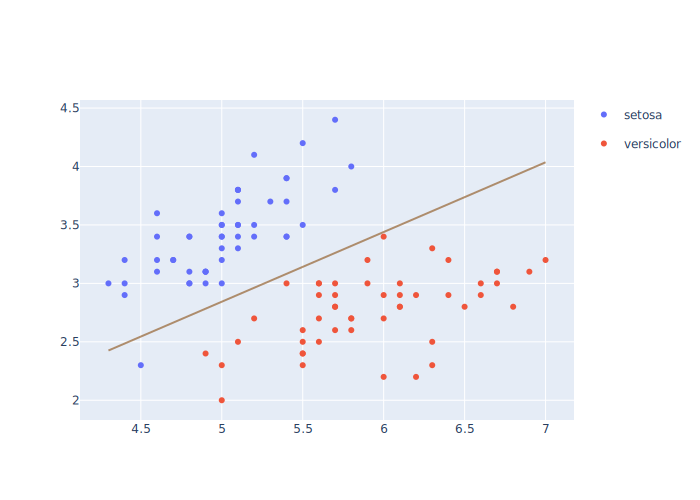

In [13]:
import plotly.graph_objects as go

fig1 = px.line(df, x=boundaries[:, 0], y=boundaries[:, 1])
fig1.update_traces(line=dict(color='rgba(150,100,50,0.7)'))
fig2 = px.scatter(df, x='sepal_length', y='sepal_width', color='species')

fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show("svg")